In [102]:
import pandas as pd
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer

In [103]:
data = pd.read_csv("Lending.csv")

In [104]:
data.head()

,is_bad,member_id,loan_status,emp_title,emp_length,home_ownership,annual_inc,pymnt_plan,desc,zip_code,...,mths_since_last_record,open_acc,pub_rec,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,revol_util_percent,policy_code
0,Yes,M1236516,Charged Off,Aqua Sun Lawn and Landscaping,5 years,RENT,50000.0,n,NaN,282xx,...,NaN,3.0,0.0,13.9,9.0,False,0.0,NaN,14%,1
1,No,M0978861,Fully Paid,USDA/FMMA,9 years,RENT,34200.0,n,NaN,605xx,...,45.0,10.0,1.0,80.6,31.0,False,0.0,NaN,81%,1
2,No,M0767668,Fully Paid,Doublepark LLC,3 years,RENT,30000.0,n,NaN,331xx,...,NaN,5.0,0.0,11.6,8.0,False,0.0,NaN,12%,1
3,No,M0879043,Fully Paid,City of Rochester,3 years,MORTGAGE,51000.0,n,NaN,146xx,...,NaN,13.0,0.0,0.0,23.0,False,0.0,NaN,0%,1
4,No,M0661671,Fully Paid,Roger George Rentals,9 years,RENT,44004.0,n,NaN,916xx,...,NaN,16.0,0.0,94.5,32.0,False,0.0,NaN,94%,1


In [105]:
data.describe()

,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
count,9499.000000,9500.000000,9497.000000,9497.000000,3503.000000,794.000000,9497.000000,9497.000000,9476.000000,9497.000000,9473.0,0.0,9500.0
mean,68057.458091,13.357560,0.148889,1.065916,35.938339,61.151134,9.346004,0.059598,48.409180,22.096873,0.0,NaN,1.0
std,48015.754329,6.758814,0.509748,1.481163,22.438549,46.230219,4.535327,0.250582,28.196322,11.615029,0.0,NaN,0.0
min,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,NaN,1.0
25%,40000.000000,8.157500,0.000000,0.000000,18.000000,0.000000,6.000000,0.000000,24.900000,13.000000,0.0,NaN,1.0
50%,58000.000000,13.440000,0.000000,1.000000,34.000000,86.000000,9.000000,0.000000,48.750000,20.000000,0.0,NaN,1.0
75%,81996.000000,18.730000,0.000000,2.000000,53.000000,101.000000,12.000000,0.000000,71.700000,29.000000,0.0,NaN,1.0
max,900000.000000,29.990000,11.000000,25.000000,120.000000,119.000000,39.000000,3.000000,100.600000,90.000000,0.0,NaN,1.0


In [106]:
data.dtypes

is_bad                          object
member_id                       object
loan_status                     object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
pymnt_plan                      object
desc                            object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                    float64
earliest_cr_line                object
inq_last_6mths                 float64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_acc                       float64
pub_rec                        float64
revol_util                     float64
total_acc                      float64
initial_list_status               bool
collections_12_mths_ex_med     float64
mths_since_last_major_derog    float64
revol_util_percent              object
policy_code              

In [107]:
#data['is_bad'] = data['is_bad'].map({'Yes': 1, 'No': 0})

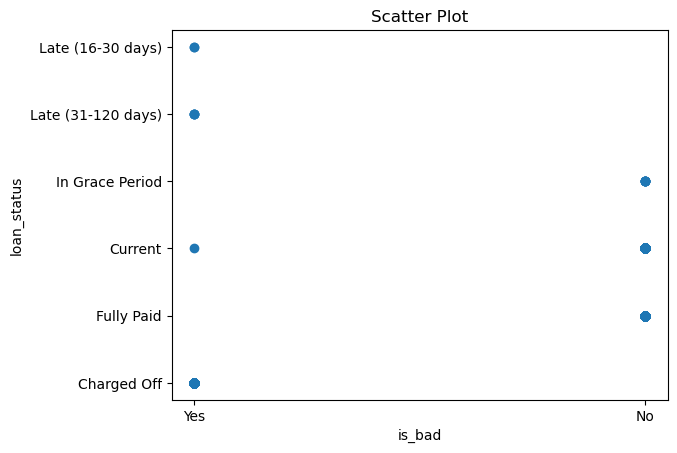

In [108]:
# Scatter plot with Target 'is_bad' against loan_status
plt.scatter(data['is_bad'], data['loan_status'])
  
# Adding Title to the Plot
plt.title("Scatter Plot")
  
# Setting the X and Y labels
plt.xlabel('is_bad')
plt.ylabel('loan_status')
  
plt.show()

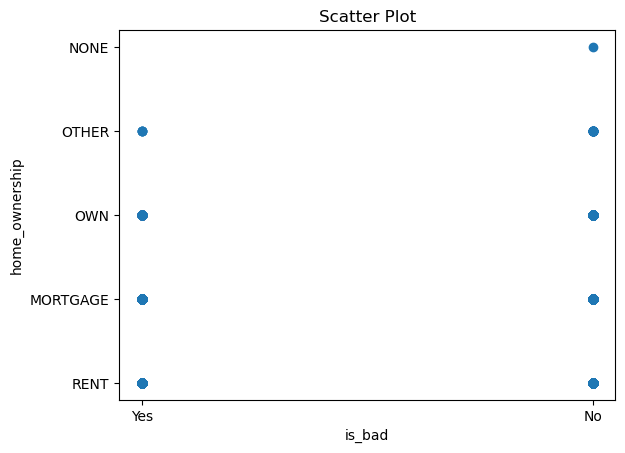

In [109]:
# Scatter plot with Target 'is_bad' against home_ownership
plt.scatter(data['is_bad'], data['home_ownership'])
  
# Adding Title to the Plot
plt.title("Scatter Plot")
  
# Setting the X and Y labels
plt.xlabel('is_bad')
plt.ylabel('home_ownership')
  
plt.show()

###### Handling missing values

In [110]:
missing_val_count_by_column = (data.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

emp_title                       565
emp_length                      249
annual_inc                        1
desc                           3076
delinq_2yrs                       3
earliest_cr_line                  3
inq_last_6mths                    3
mths_since_last_delinq         5997
mths_since_last_record         8706
open_acc                          3
pub_rec                           3
revol_util                       24
total_acc                         3
collections_12_mths_ex_med       27
mths_since_last_major_derog    9500
revol_util_percent               24
dtype: int64


In [111]:
cols_with_missing = [col for col in data.columns
                     if data[col].isnull().any()]
cols_with_missing

['emp_title',
 'emp_length',
 'annual_inc',
 'desc',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_util',
 'total_acc',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'revol_util_percent']

In [112]:
reduced_data = data.drop(cols_with_missing, axis=1)

In [113]:
reduced_data

,is_bad,member_id,loan_status,home_ownership,pymnt_plan,zip_code,addr_state,dti,initial_list_status,policy_code
0,Yes,M1236516,Charged Off,RENT,n,282xx,NC,7.99,False,1
1,No,M0978861,Fully Paid,RENT,n,605xx,IL,22.74,False,1
2,No,M0767668,Fully Paid,RENT,n,331xx,FL,2.36,False,1
3,No,M0879043,Fully Paid,MORTGAGE,n,146xx,NY,11.20,False,1
4,No,M0661671,Fully Paid,RENT,n,916xx,CA,22.47,False,1
...,...,...,...,...,...,...,...,...,...,...
9495,No,M1059148,Current,RENT,n,773xx,TX,16.99,False,1
9496,No,M1008294,Fully Paid,RENT,n,299xx,SC,12.67,False,1
9497,No,M0653678,Fully Paid,OWN,n,917xx,CA,17.61,False,1
9498,No,M0320272,Fully Paid,OWN,n,347xx,FL,7.60,False,1


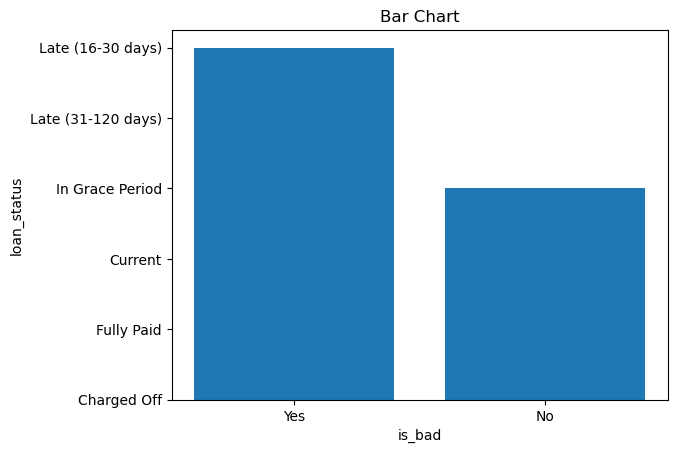

In [114]:
# Bar chart with Target 'is_bad' against loan_status
plt.bar(data['is_bad'], data['loan_status'])
  
plt.title("Bar Chart")
  
# Setting the X and Y labels
plt.xlabel('is_bad')
plt.ylabel('loan_status')
  

plt.show()

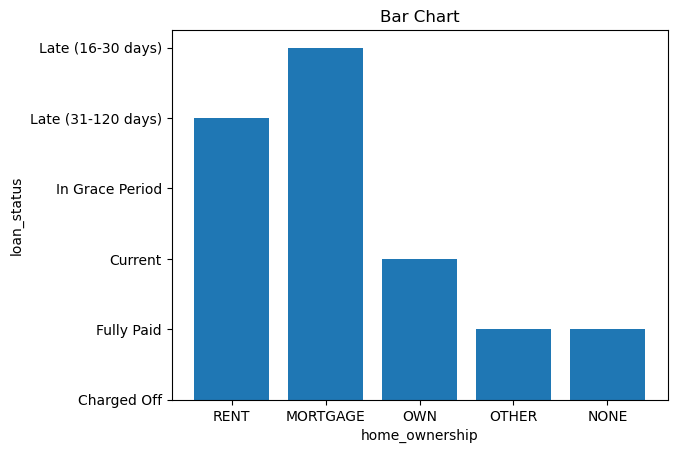

In [115]:
# Bar chart with 'home_ownership' against loan_status
plt.bar(data['home_ownership'], data['loan_status'])
  
plt.title("Bar Chart")
  
# Setting the X and Y labels
plt.xlabel('home_ownership')
plt.ylabel('loan_status')
  

plt.show()

###### Feature Engineering

Dropping variables which are too unique to help with prediction

In [116]:
reduced_data.nunique()

is_bad                    2
member_id              9500
loan_status               6
home_ownership            5
pymnt_plan                2
zip_code                716
addr_state               49
dti                    2560
initial_list_status       1
policy_code               1
dtype: int64

In [117]:
reduced_data = reduced_data.drop(['member_id','zip_code','addr_state','addr_state','dti'], axis=1)

In [118]:
reduced_data.nunique()

is_bad                 2
loan_status            6
home_ownership         5
pymnt_plan             2
initial_list_status    1
policy_code            1
dtype: int64

In [119]:
reduced_data.head()

,is_bad,loan_status,home_ownership,pymnt_plan,initial_list_status,policy_code
0,Yes,Charged Off,RENT,n,False,1
1,No,Fully Paid,RENT,n,False,1
2,No,Fully Paid,RENT,n,False,1
3,No,Fully Paid,MORTGAGE,n,False,1
4,No,Fully Paid,RENT,n,False,1


In [120]:
y =reduced_data['is_bad']
reduced_data = reduced_data.drop(['is_bad'], axis=1)

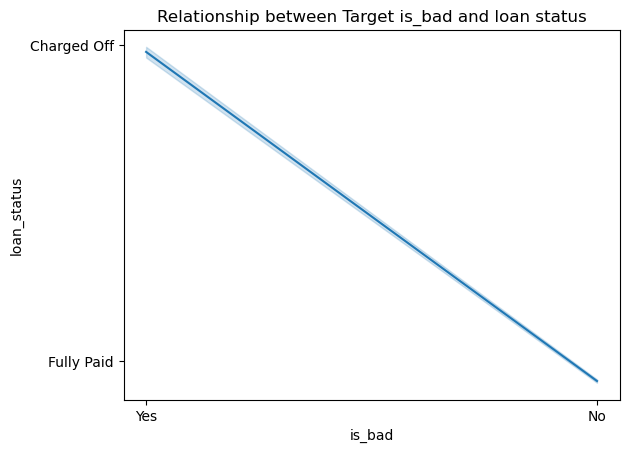

In [121]:
# draw lineplot
sns.lineplot(x="is_bad", y="loan_status", data=data)
  
# setting the title using Matplotlib
plt.title('Relationship between Target is_bad and loan status')

  
plt.show()

In [122]:
s = (reduced_data.dtypes == 'object')
object_cols = list(s[s].index)

In [123]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
reduced_data[object_cols] = ordinal_encoder.fit_transform(reduced_data[object_cols])


In [124]:
reduced_data

,loan_status,home_ownership,pymnt_plan,initial_list_status,policy_code
0,0.0,4.0,0.0,False,1
1,2.0,4.0,0.0,False,1
2,2.0,4.0,0.0,False,1
3,2.0,0.0,0.0,False,1
4,2.0,4.0,0.0,False,1
...,...,...,...,...,...
9495,1.0,4.0,0.0,False,1
9496,2.0,4.0,0.0,False,1
9497,2.0,3.0,0.0,False,1
9498,2.0,3.0,0.0,False,1


Add Ordinal  Encoding

Test train split 

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
X = reduced_data

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

Model selection 

In [128]:
! pip install xgboost

In [129]:
def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_cross = cross_val(X_train, y_train, model)
    
    # Return the performance metric
    return model_cross

In [130]:
# # Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random_cross = fit_and_evaluate(random)

print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

Random Forest Performance on the test set: Cross Validation Score = 0.9997


In [131]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [132]:
# # Gradient Boosting Classification
from xgboost import XGBClassifier
gb = XGBClassifier()
gb_cross = fit_and_evaluate(gb)

print('Gradient Boosting Classification Performance on the test set: Cross Validation Score = %0.4f' % gb_cross)

Gradient Boosting Classification Performance on the test set: Cross Validation Score = 0.9989


### Create the scoring file 

In [133]:
scoring = pd.read_csv("scoring.csv")

In [134]:
scoring.head()

,member_id,loan_status,emp_title,emp_length,home_ownership,annual_inc,pymnt_plan,desc,zip_code,addr_state,...,mths_since_last_record,open_acc,pub_rec,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,revol_util_percent,policy_code
0,M0074469,Fully Paid,NaN,< 1 year,RENT,6000.0,n,I just need enough money to make it until the ...,325xx,FL,...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,1
1,M0083132,Fully Paid,Mana Products,6 years,RENT,50000.0,n,I have a couple of credit cards and I am tryin...,100xx,NY,...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,1
2,M0090390,Fully Paid,NaN,< 1 year,MORTGAGE,100000.0,n,NaN,017xx,MA,...,0.0,11.0,0.0,19.4,20.0,False,NaN,NaN,19%,1
3,M0109346,Fully Paid,Eastland Park Hotel,< 1 year,RENT,20000.0,n,I've had far too many issues with Bank of Amer...,041xx,ME,...,0.0,3.0,0.0,75.8,4.0,False,NaN,NaN,76%,1
4,M0112493,Fully Paid,Fairfield Manufacturing,2 years,MORTGAGE,36153.0,n,I am currently paying for 2 car loans. Mine w...,479xx,IN,...,61.0,3.0,1.0,70.9,6.0,False,NaN,NaN,71%,1


In [135]:
missing_val_count_by_column = (scoring.isnull().sum())
cols_with_missing = [col for col in scoring.columns
                     if scoring[col].isnull().any()]
reduced_scoring = scoring.drop(cols_with_missing, axis=1)
reduced_scoring = reduced_scoring.drop(['member_id','zip_code','addr_state','addr_state','dti','annual_inc'], axis=1)


In [136]:
reduced_scoring

,loan_status,home_ownership,pymnt_plan,initial_list_status,policy_code
0,Fully Paid,RENT,n,False,1
1,Fully Paid,RENT,n,False,1
2,Fully Paid,MORTGAGE,n,False,1
3,Fully Paid,RENT,n,False,1
4,Fully Paid,MORTGAGE,n,False,1
...,...,...,...,...,...
494,Fully Paid,MORTGAGE,n,False,1
495,Fully Paid,RENT,n,False,1
496,Fully Paid,RENT,n,False,1
497,Fully Paid,RENT,n,False,1


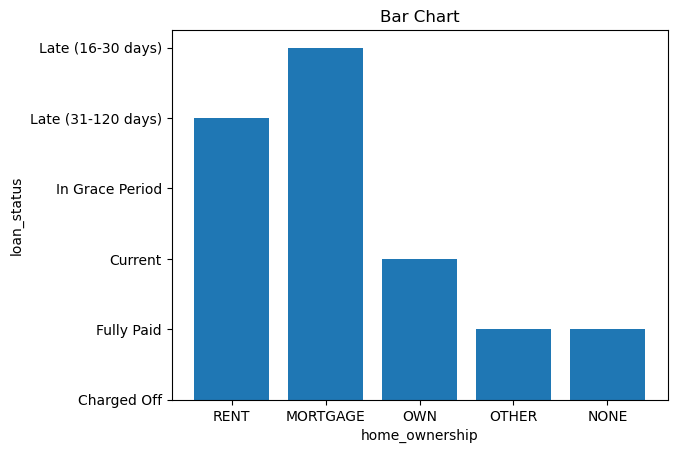

In [137]:
# Bar chart with loan_status against home_ownership

plt.bar(data['home_ownership'], data['loan_status'])
  
plt.title("Bar Chart")
  
# Setting the X and Y labels
plt.xlabel('home_ownership')
plt.ylabel('loan_status')
  
# Adding the legends
plt.show()
  

In [138]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
reduced_scoring[object_cols] = ordinal_encoder.fit_transform(reduced_scoring[object_cols])


In [139]:
reduced_scoring

,loan_status,home_ownership,pymnt_plan,initial_list_status,policy_code
0,2.0,3.0,0.0,False,1
1,2.0,3.0,0.0,False,1
2,2.0,0.0,0.0,False,1
3,2.0,3.0,0.0,False,1
4,2.0,0.0,0.0,False,1
...,...,...,...,...,...
494,2.0,0.0,0.0,False,1
495,2.0,3.0,0.0,False,1
496,2.0,3.0,0.0,False,1
497,2.0,3.0,0.0,False,1


In [140]:
prediction_scoring = random.predict(reduced_scoring)

In [141]:
prediction_scoring

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No

In [142]:
submission = pd.DataFrame({'member_id':scoring['member_id'],'is_bad':prediction_scoring})

In [143]:
submission.head()

,member_id,is_bad
0,M0074469,No
1,M0083132,No
2,M0090390,No
3,M0109346,No
4,M0112493,No


In [144]:
submission.tail()

,member_id,is_bad
494,M1293876,No
495,M1295580,No
496,M1300973,No
497,M1304166,No
498,M1314167,Yes


In [145]:
filename = 'ScoringSubmission.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: ScoringSubmission.csv
